[[('n02123045', 'tabby', 0.39950508), ('n02123159', 'tiger_cat', 0.33509362), ('n02124075', 'Egyptian_cat', 0.1540604), ('n02127052', 'lynx', 0.0062546115), ('n02971356', 'carton', 0.0035801616)]]
False
3.5708647e-06


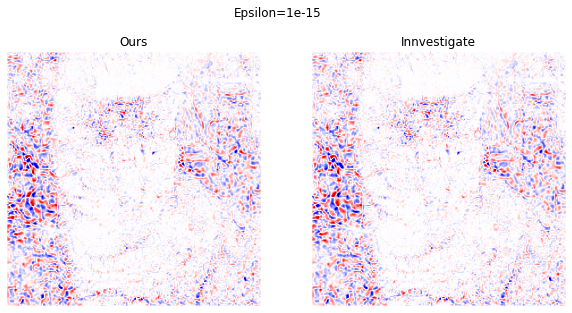

False
0.0068008


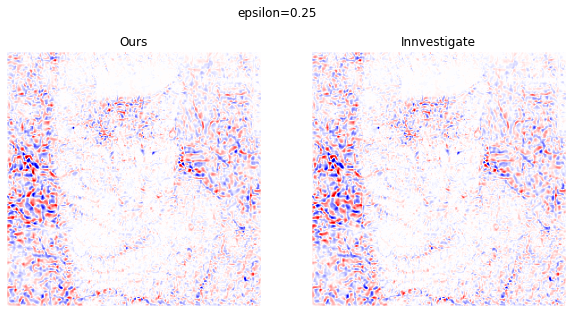

False
0.00020790883


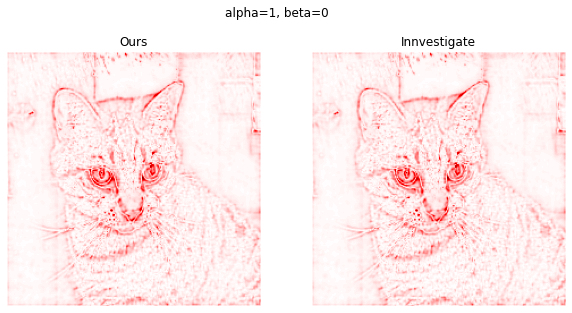

False
0.018112361
1.0


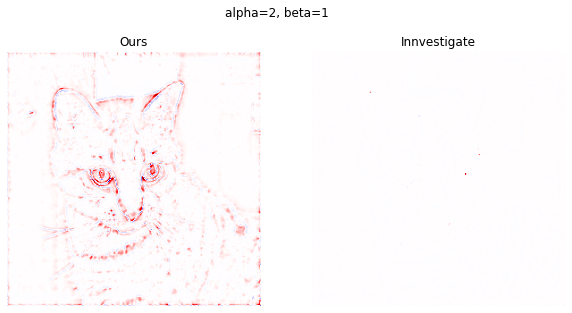

False
0.01423183


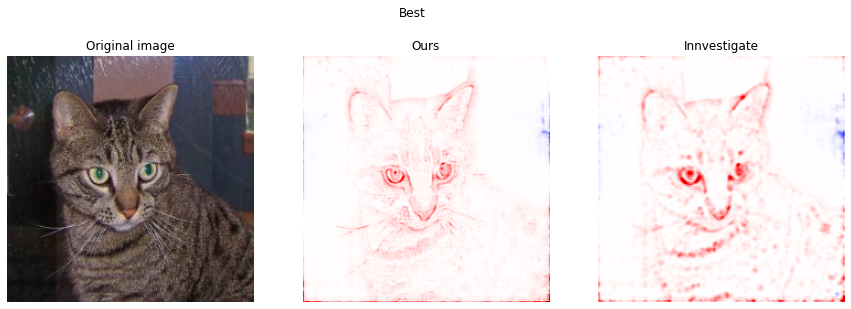

In [19]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions
from skimage.io import imread
from skimage.transform import resize
from explainability import LRP, LRPStrategy


model = VGG19(weights='/home/esten/.keras/models/vgg19_weights_tf_dim_ordering_tf_kernels.h5')

image = np.load('/home/esten/preprocessed_cat.npy')
original_image = np.load('/home/esten/original_cat.npy')

predictions = model.predict(np.expand_dims(image, 0))
print(decode_predictions(predictions))

lrp = LRP(model, layer=len(model.layers) - 1, idx=281, epsilon=1e-15)
explanations = lrp(np.expand_dims(image, 0))
explanations = np.sum(explanations, axis=-1)
explanations = explanations / np.amax(np.abs(explanations))

innvestigate = np.load('/home/esten/cat_explanations_none.npy')
innvestigate = np.sum(innvestigate, axis=-1)
innvestigate = innvestigate / np.amax(np.abs(innvestigate))
print(np.array_equal(explanations[0], innvestigate))
print(np.mean(np.abs(explanations[0] - innvestigate)))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Epsilon=1e-15')

ax[0].imshow(explanations[0], cmap='seismic', clim=(-1, 1))
ax[0].axis('off')
ax[0].set_title('Ours')
ax[1].imshow(innvestigate, cmap='seismic', clim=(-1, 1))
ax[1].axis('off')
ax[1].set_title('Innvestigate')
plt.show()

lrp = LRP(model, layer=len(model.layers) - 1, idx=281, epsilon=0.25)
explanations = lrp(np.expand_dims(image, 0))
explanations = np.sum(explanations, axis=-1)
explanations = explanations / np.amax(np.abs(explanations))

innvestigate = np.load('/home/esten/cat_explanations_eps.npy')
innvestigate = np.sum(innvestigate, axis=-1)
innvestigate = innvestigate / np.amax(np.abs(innvestigate))
print(np.array_equal(explanations[0], innvestigate))
print(np.mean(np.abs(explanations[0] - innvestigate)))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('epsilon=0.25')

ax[0].imshow(explanations[0], cmap='seismic', clim=(-1, 1))
ax[0].axis('off')
ax[0].set_title('Ours')
ax[1].imshow(innvestigate, cmap='seismic', clim=(-1, 1))
ax[1].axis('off')
ax[1].set_title('Innvestigate')
plt.show()

lrp = LRP(model, layer=len(model.layers) - 1, idx=281, alpha=1, beta=0)
explanations = lrp(np.expand_dims(image, 0))
explanations = np.sum(explanations, axis=-1)
explanations = explanations / np.amax(np.abs(explanations))

innvestigate = np.load('/home/esten/cat_explanations_a1b0.npy')
innvestigate = np.sum(innvestigate, axis=-1)
innvestigate = innvestigate / np.amax(np.abs(innvestigate))
print(np.array_equal(explanations[0], innvestigate))
print(np.mean(np.abs(explanations[0] - innvestigate)))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('alpha=1, beta=0')

ax[0].imshow(explanations[0], cmap='seismic', clim=(-1, 1))
ax[0].axis('off')
ax[0].set_title('Ours')
ax[1].imshow(innvestigate, cmap='seismic', clim=(-1, 1))
ax[1].axis('off')
ax[1].set_title('Innvestigate')
plt.show()

lrp = LRP(model, layer=len(model.layers) - 1, idx=281, alpha=2, beta=1)
explanations = lrp(np.expand_dims(image, 0))
explanations = np.sum(explanations, axis=-1)
explanations = explanations / np.amax(np.abs(explanations))

innvestigate = np.load('/home/esten/cat_explanations_a2b1.npy')
innvestigate = np.sum(innvestigate, axis=-1)
innvestigate = innvestigate / np.amax(np.abs(innvestigate))
print(np.array_equal(explanations[0], innvestigate))
print(np.mean(np.abs(explanations[0] - innvestigate)))
print(np.amax(innvestigate))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('alpha=2, beta=1')

ax[0].imshow(explanations[0], cmap='seismic', clim=(-1, 1))
ax[0].axis('off')
ax[0].set_title('Ours')
ax[1].imshow(innvestigate, cmap='seismic', clim=(-1, 1))
ax[1].axis('off')
ax[1].set_title('Innvestigate')
plt.show()

alpha=1.5
beta=0.5

strategy = LRPStrategy(
    layers=[
        {'b': True, 'alpha': 1, 'beta': 0},
        {'alpha': alpha, 'beta': beta},
        {'alpha': alpha, 'beta': beta},
        {'alpha': alpha, 'beta': beta},
        {'alpha': alpha, 'beta': beta},
        {'alpha': alpha, 'beta': beta},
        {'alpha': alpha, 'beta': beta},
        {'alpha': alpha, 'beta': beta},
        {'alpha': alpha, 'beta': beta},
        {'alpha': alpha, 'beta': beta},
        {'alpha': alpha, 'beta': beta},
        {'alpha': alpha, 'beta': beta},
        {'alpha': alpha, 'beta': beta},
        {'alpha': alpha, 'beta': beta},
        {'alpha': alpha, 'beta': beta},
        {'epsilon': 0.25},
        {'epsilon': 0.25},
        {'epsilon': 0.25},
        {'epsilon': 0.25},
    ]
)

lrp = LRP(model, layer=len(model.layers) - 1, idx=281, strategy=strategy)
explanations = lrp(np.expand_dims(image, 0) + np.amin(image))
explanations = np.sum(explanations, axis=-1)
explanations = explanations / np.amax(np.abs(explanations))

innvestigate = np.load('/home/esten/cat_explanations_best.npy')
innvestigate = np.sum(innvestigate, axis=-1)
innvestigate = innvestigate / np.amax(np.abs(innvestigate))
print(np.array_equal(explanations[0], innvestigate))
print(np.mean(np.abs(explanations[0] - innvestigate)))

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Best')

ax[0].imshow(original_image)
ax[0].axis('off')
ax[0].set_title('Original image')
ax[1].imshow(explanations[0], cmap='seismic', clim=(-1, 1))
ax[1].axis('off')
ax[1].set_title('Ours')
ax[2].imshow(innvestigate, cmap='seismic', clim=(-1, 1))
ax[2].axis('off')
ax[2].set_title('Innvestigate')
plt.show()

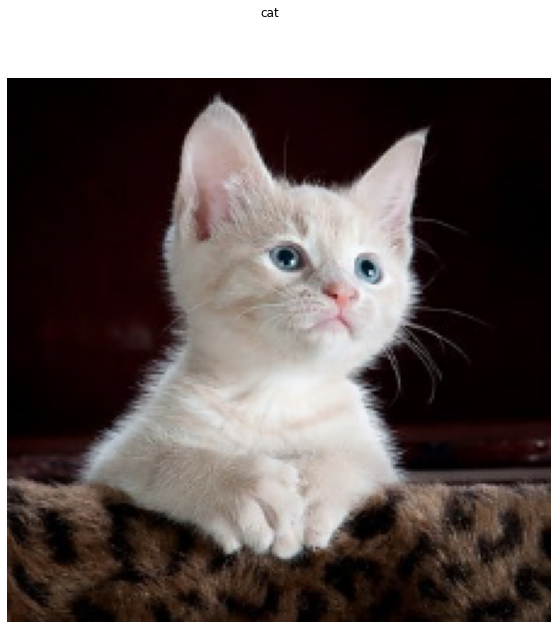

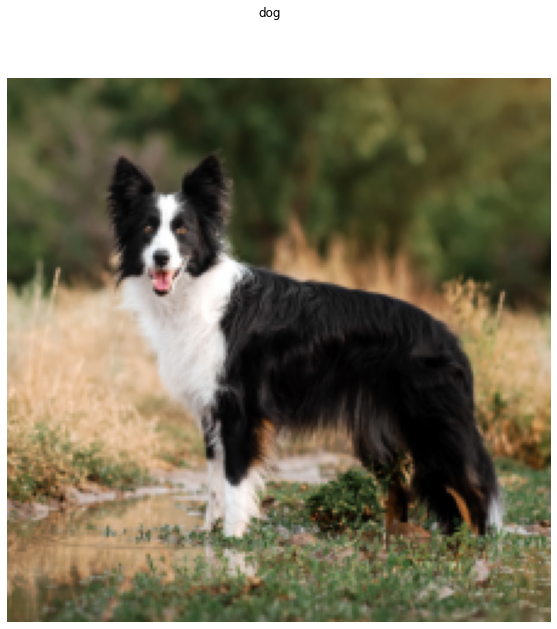

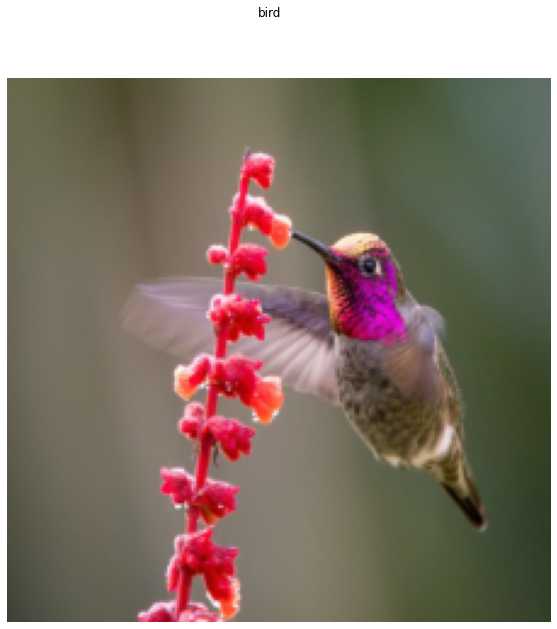

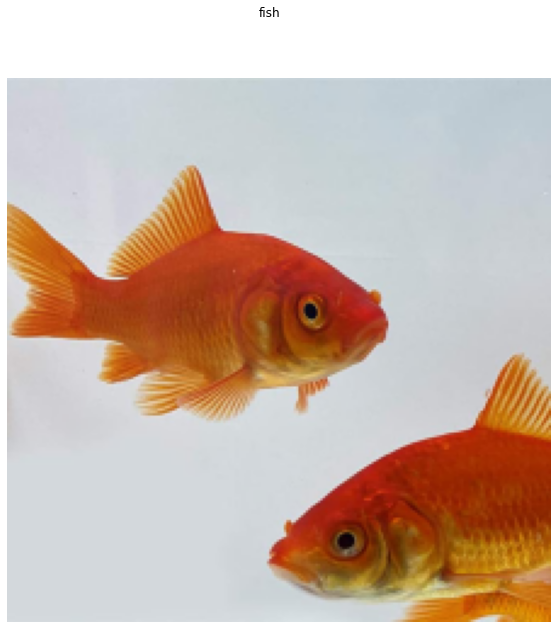

In [20]:
import requests
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread
from skimage.transform import resize


urls = {
    'cat': 'https://cdn.pixabay.com/photo/2014/11/30/14/11/cat-551554__340.jpg',
    'dog': ('https://static.wikia.nocookie.net/naturerules1/images/f/f9/Border-collie-1.jpg/'
            'revision/latest?cb=20210403210149'),
    'bird': 'https://static.independent.co.uk/2021/04/29/22/newFile-3.jpg?quality=75&width=1200&auto=webp',
    'fish': 'https://m.media-amazon.com/images/I/61QN8NWuNlL._AC_SX679_.jpg'
}

images = {}
original_images = {}

for key in urls:
    req = requests.get(urls[key])

    with open(f'/tmp/{key}.jpg', 'wb') as f:
        f.write(req.content)

    fig = plt.figure(figsize=(10, 10))
    fig.suptitle(key)
    img = imread(f'/tmp/{key}.jpg')
    img = resize(img, (224, 224), preserve_range=True)
    img = img.astype(np.uint8)
    original_images[key] = img
    plt.imshow(img)
    plt.gca().axis('off')
    plt.show()
    
    img = preprocess_input(img)
    images[key] = img

In [21]:
for key in images:
    prediction = model.predict(np.expand_dims(images[key], axis=0))
    print(f'Actual class: {key}')
    print('Predictions:')
    print(decode_predictions(prediction, 10))

Actual class: cat
Predictions:
[[('n02124075', 'Egyptian_cat', 0.5702428), ('n02123045', 'tabby', 0.22358966), ('n02123159', 'tiger_cat', 0.08013459), ('n02127052', 'lynx', 0.030481633), ('n03085013', 'computer_keyboard', 0.02249998), ('n03793489', 'mouse', 0.008207956), ('n02123597', 'Siamese_cat', 0.008201845), ('n03642806', 'laptop', 0.005193917), ('n02123394', 'Persian_cat', 0.004617361), ('n04074963', 'remote_control', 0.00424049)]]
Actual class: dog
Predictions:
[[('n02106166', 'Border_collie', 0.86433685), ('n02106030', 'collie', 0.11977325), ('n02086910', 'papillon', 0.008389887), ('n02105855', 'Shetland_sheepdog', 0.0057414775), ('n02105056', 'groenendael', 0.00054181356), ('n02107683', 'Bernese_mountain_dog', 0.00030215768), ('n02113186', 'Cardigan', 0.0002027266), ('n02085782', 'Japanese_spaniel', 0.00014763027), ('n02090622', 'borzoi', 0.00011002268), ('n02102040', 'English_springer', 7.221178e-05)]]
Actual class: bird
Predictions:
[[('n01833805', 'hummingbird', 0.9999993),

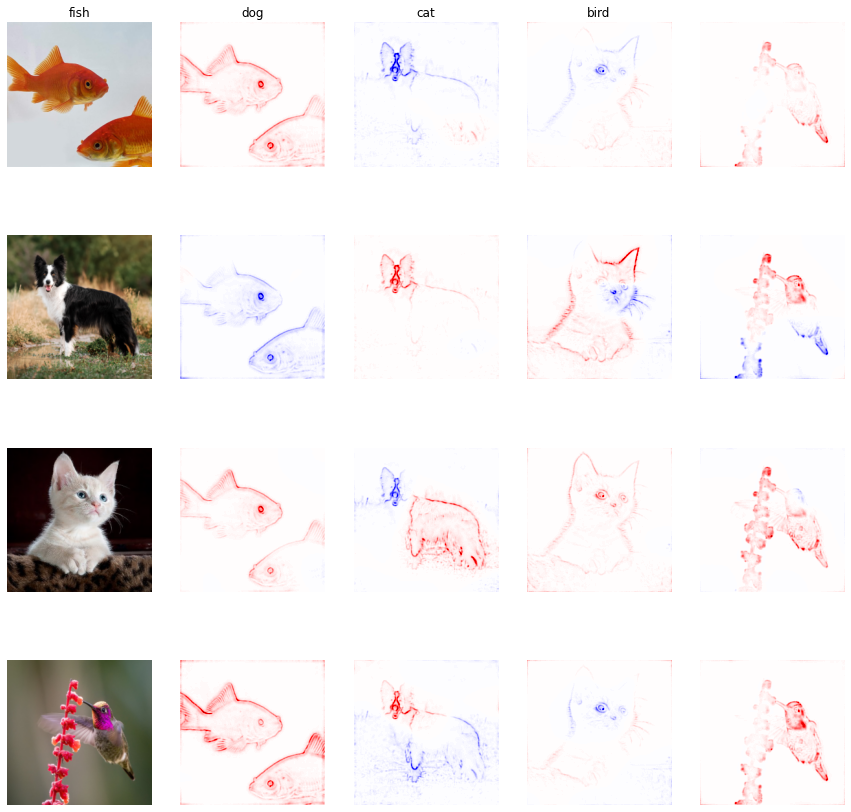

In [22]:
from explainability import LRP

idx = [
    ('fish', 1),
    ('dog', 232),
    ('cat', 281),
    ('bird', 94)
]

explainers = {
    p[0]: LRP(model, layer=26, idx=p[1], strategy=strategy) \
    for p in idx
}

fig, ax = plt.subplots(4, 5, figsize=(15, 15))

explanations = np.zeros((4, 4), dtype=object)

keys = [p[0] for p in idx]

for i in range(4):
    ax[0][i].set_title(keys[i])
    ax[i][0].imshow(original_images[keys[i]])
    ax[i][0].axis('off')

for i in range(len(keys)):
    for j in range(len(keys)):
        explanations[i][j] = explainers[keys[i]](np.expand_dims(images[keys[j]], axis=0))

for i in range(len(explanations)):
    for j in range(len(explanations[i])):
        explanation = np.sum(explanations[i][j][0], axis=-1)
        explanation = explanation / np.amax(np.abs(explanation))
        ax[i][j+1].imshow(explanation, cmap='seismic', clim=(-1, 1))
        ax[i][j+1].axis('off')
        
        
plt.show()